# Парсинг HTML. BeautifulSoup.

### Скрейпинг и парсинг данных одной страницы.

In [106]:
# Импорт необходимых библиотек
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [192]:
# Путь к странице с данным
website = "https://www.eapteka.ru/goods/drugs/otolaryngology/"

In [204]:
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 YaBrowser/24.10.0.0 Safari/537.36"
         }

In [205]:
# GET-запрос к серверу
page = requests.get(website, headers=headers)


In [207]:
# Проверка статуса ответа сервера
page.status_code

200

In [208]:
type(page.text)

str

In [209]:
type(page.content)

bytes

In [210]:
# Парсинг данных 
soup = BeautifulSoup(page.content, 'html.parser')

'<!DOCTYPE html>\n<html>\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n  <noscript><meta http-equiv="refresh" content="0; url=/exhkqyad"></noscript>\n</head>\n<style>\n    .container {\n      display: flex;\n      align-content: center;\n      align-items: center;\n      justify-content: center;\n      flex-direction: column;\n      min-height: 100vh;\n    }\n    .load {\n      color: grey;\n      font-size: 3vh;\n    }\n    .spinner {\n      display: block;\n      background:  url(\'\');\n      width: 64px;\n      height: 64px;\n    }\n</style>\n<body>\n  <div id="id_spinner" class="container"><div class="load"></div><div class="spinner"></div></div>\n  <div id="id_captcha_frame_div" style="display: none;height: 100vh;"></div>\n  <script type="text/javascript" src="//servicepipe.ru/static/jsrsasign-all-min.js"></script>\n  <script type="text/javascript" src="//servicepipe.ru/static/fp.min.js"></script>\n  <script type="text/javascript">\nfunction _0x3
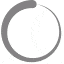

In [211]:
page.text

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<noscript><meta content="0; url=/exhkqyad" http-equiv="refresh"/></noscript>
</head>
<style>
    .container {
      display: flex;
      align-content: center;
      align-items: center;
      justify-content: center;
      flex-direction: column;
      min-height: 100vh;
    }
    .load {
      color: grey;
      font-size: 3vh;
    }
    .spinner {
      display: block;
      background:  url('');
      width: 64px;
      height: 64px;
    }
</style>
<body>
<div class="container" id="id_spinner"><div class="load"></div><div class="spinner"></div></div>
<div id="id_captcha_frame_div" style="display: none;height: 100vh;"></div>
<script src="//servicepipe.ru/static/jsrsasign-all-min.js" type="text/javascript"></script>
<script src="//servicepipe.ru/static/fp.min.js" type="text/javascript"></script>
<script type="text/javascript">
function _0x3222(_0x13ef43,_0x2bafe1){const _0x1f5c67=_0x13
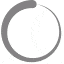

In [212]:
soup

In [158]:
# Поиск по тегу <div>
result = soup.find_all('div', ('class','listing-card__content'))

In [159]:
len(result)

0

In [13]:
type(result)

bs4.element.ResultSet

### Скрейпинг ссылок на каждый товар

In [14]:
# Первая часть ссылки
url_1 = 'https://apteka.ru'

In [15]:
# # Извлечение списка относительных ссылок на товары
# url_2 = []
# for i in result:
#   # print(i)
#   # print(len(i))
#   for link in i.find_all('div', ('class','CardMini__link')):
#     # print(link)
#     url_2.append(link.find('a').get('href'))

In [16]:

url_2 = []
for i in result:
  # print(i)
  # print(len(i))
  for link in i.find_all('a', href=True): 
    # print(link)
    url_2.append(link['href']) # Извлекаем значение атрибута 'href'
print(url_2)


['/product/czetirizin-velfarm-10-mg-20-sht-blister-tabletki-pokrytye-plenochnoj-obolochkoj-66dedf57b0680c814de1e69c/?ci=1', '/product/kestin-20-mg-10-sht-tabletki-liofilizat-5e327a01f5a9ae0001410f34/?ci=2', '/product/dezloratadin-5-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3278b4f5a9ae000141039d/?ci=3', '/product/montral-ml-5-mg--10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-6454c3ab1117d3e508f95cc4/?ci=4', '/product/zodak-10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3277c7f5a9ae000140fb8c/?ci=5', '/product/zodak-001ml-kapli-20-ml-5e3267d4ca7bdc000192c94d/?ci=6', '/product/loratadin-10-mg-10-sht-tabletki-632c71ca8b13006e5c222f07/?ci=7', '/product/zirtek-001ml-kapli-dlya-priema-vnutr-20-ml-5efdbc5ea087c4000102c0f8/?ci=8', '/product/loratadin-10-mg-10-sht-tabletki-62b1ab3fe33c027491b59c89/?ci=9', '/product/niksar-20-mg-10-sht-tabletki-5ee08e0ee3c99e00011d78b0/?ci=10', '/product/lordestin-5-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e326ce065b5ab00016535

In [17]:
len(url_2)

45

In [18]:
url_2

['/product/czetirizin-velfarm-10-mg-20-sht-blister-tabletki-pokrytye-plenochnoj-obolochkoj-66dedf57b0680c814de1e69c/?ci=1',
 '/product/kestin-20-mg-10-sht-tabletki-liofilizat-5e327a01f5a9ae0001410f34/?ci=2',
 '/product/dezloratadin-5-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3278b4f5a9ae000141039d/?ci=3',
 '/product/montral-ml-5-mg--10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-6454c3ab1117d3e508f95cc4/?ci=4',
 '/product/zodak-10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3277c7f5a9ae000140fb8c/?ci=5',
 '/product/zodak-001ml-kapli-20-ml-5e3267d4ca7bdc000192c94d/?ci=6',
 '/product/loratadin-10-mg-10-sht-tabletki-632c71ca8b13006e5c222f07/?ci=7',
 '/product/zirtek-001ml-kapli-dlya-priema-vnutr-20-ml-5efdbc5ea087c4000102c0f8/?ci=8',
 '/product/loratadin-10-mg-10-sht-tabletki-62b1ab3fe33c027491b59c89/?ci=9',
 '/product/niksar-20-mg-10-sht-tabletki-5ee08e0ee3c99e00011d78b0/?ci=10',
 '/product/lordestin-5-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e326ce065b5

In [19]:
import urllib.parse

In [20]:
# Объединение двух частей ссылки в абсолютный путь и создание списка со ссылками на каждый товар, расположенный на странице
url_joined = []

for link in url_2:
  url_joined.append(urllib.parse.urljoin(url_1, link))

In [21]:
url_joined

['https://apteka.ru/product/czetirizin-velfarm-10-mg-20-sht-blister-tabletki-pokrytye-plenochnoj-obolochkoj-66dedf57b0680c814de1e69c/?ci=1',
 'https://apteka.ru/product/kestin-20-mg-10-sht-tabletki-liofilizat-5e327a01f5a9ae0001410f34/?ci=2',
 'https://apteka.ru/product/dezloratadin-5-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3278b4f5a9ae000141039d/?ci=3',
 'https://apteka.ru/product/montral-ml-5-mg--10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-6454c3ab1117d3e508f95cc4/?ci=4',
 'https://apteka.ru/product/zodak-10-mg-10-sht-tabletki-pokrytye-plenochnoj-obolochkoj-5e3277c7f5a9ae000140fb8c/?ci=5',
 'https://apteka.ru/product/zodak-001ml-kapli-20-ml-5e3267d4ca7bdc000192c94d/?ci=6',
 'https://apteka.ru/product/loratadin-10-mg-10-sht-tabletki-632c71ca8b13006e5c222f07/?ci=7',
 'https://apteka.ru/product/zirtek-001ml-kapli-dlya-priema-vnutr-20-ml-5efdbc5ea087c4000102c0f8/?ci=8',
 'https://apteka.ru/product/loratadin-10-mg-10-sht-tabletki-62b1ab3fe33c027491b59c89/?ci=9',
 'http

### Извлечение данных одного товара

In [22]:
# Ссылка на первый товар
first_link = url_joined[0]
print(first_link)

https://apteka.ru/product/czetirizin-velfarm-10-mg-20-sht-blister-tabletki-pokrytye-plenochnoj-obolochkoj-66dedf57b0680c814de1e69c/?ci=1


In [23]:
# GET-запрос серверу
response = requests.get(first_link)

In [24]:
# Парсинг данных
soup = BeautifulSoup(response.content, 'html.parser')

In [25]:
soup

<!DOCTYPE html>
<html lang="ru"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="telephone=no" name="format-detection"/><style id="critical">body{background:#fff;color:#000;font-family:Source Sans Pro,sans-serif;font-size:100%;font-style:normal;font-weight:400;line-height:1.2}svg{fill:currentColor}.no-select{user-select:none}.rub{font-size:.9em}.h1,h1{color:#1c257b;font-size:1.5rem;font-weight:600;line-height:150%;margin:1rem 0}@media (max-width:800px){.h1,h1{font-size:1.125rem;line-height:27px}}.h2,h2{color:#1c257b;font-size:1.25rem;font-weight:600;line-height:150%;margin:1rem 0}@media (max-width:800px){.h2,h2{font-size:1.125rem}}.h3,h3{color:#1c257b;line-height:150%;margin:1rem 0}.h3,h3,h5{font-size:1rem;font-weight:600}p{margin:1em 0}.caption3{color:#999;font-size:12px;font-weight:400;line-height:16px}.link,a{background:none;color:#4665d7;cursor:pointer;outline:0;text-decoration:none;transition:color .25s ease-in-out}.link[aria-disabl

In [26]:
# Парсинг названия товара
name = soup.find('h1', ('class', 'ViewProductPage__title')).text
name

'Цетиризин велфарм 10 мг 20 шт. блистер таблетки, покрытые пленочной оболочкой'

In [27]:
import re

In [28]:
form = soup.find('dt', text=re.compile('Форма выпуска'))
print(form)

<dt>Форма выпуска</dt>


C:\Users\nephelim\AppData\Local\Temp\ipykernel_43316\3374006543.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  form = soup.find('dt', text=re.compile('Форма выпуска'))


In [29]:
form.get_text(strip=True)

'Форма выпуска'

In [82]:
# Парсинг формы выпуска
form_v = 'Форма выпуска'
form = soup.find('dt', text=re.compile(form_v)).get_text(strip=True)
if form:
    print(f"{form}: {soup.find('dt', text=re.compile('Форма выпуска')).parent.get_text()[len(form_v):]}")
#     print(form)
#     form = soup.find('dt', text=re.compile('Форма выпуска')).parent.get_text()[len('Форма выпуска'):]
#     print(form)
    

Форма выпуска: таблетки, покрытые пленочной оболочкой


C:\Users\nephelim\AppData\Local\Temp\ipykernel_43316\4003819569.py:3: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  form = soup.find('dt', text=re.compile(form_v)).get_text(strip=True)
C:\Users\nephelim\AppData\Local\Temp\ipykernel_43316\4003819569.py:5: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  print(f"{form}: {soup.find('dt', text=re.compile('Форма выпуска')).parent.get_text()[len(form_v):]}")


In [37]:
# Парсинг содержания
content = soup.find('dt', text=re.compile('Содержание:')).get_text(strip=True)
content

C:\Users\nephelim\AppData\Local\Temp\ipykernel_43316\564970221.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  content = soup.find('dt', text=re.compile('Содержание:')).get_text(strip=True)


AttributeError: 'NoneType' object has no attribute 'get_text'

In [32]:
content = int(re.findall(r'\d+', content)[0])
content

20

In [33]:
# Парсинг производителя
manufacturer = soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:]
manufacturer

'Hexal AG'

In [34]:
# Парсинг цены товара
price = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
price

'5,19\xa0€'

In [35]:
type(price)

str

In [36]:
price = price.replace(',', '.')

In [37]:
price = re.sub(r'[^\d.]+', '', price)
price

'5.19'

In [38]:
price = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
price = price.replace(',', '.')
price = re.sub(r'[^\d.]+', '', price)
float(price)

5.19

In [ ]:
float(price)

### Объединяем все вместе - скрейпинг и парсинг информации о всех товарах одной страницы

In [39]:
# Пустые списки, которые будут содержать соответствующие данные: название, цена, форма выпуска, содержание, производитель
name =[]
price =[]
form = []
content =[]
manufacturer =[]

In [40]:
# Создание пустого словаря, который будет содержать все получаемые данные
output ={}

In [41]:
# Цикл по списку ссылок на товары
for i in url_joined:
  response = requests.get(i)
  soup = BeautifulSoup(response.content, 'html.parser')

# Парсинг названия товара. Обработка исключения: добавляем пустую строку.
  try:
    name.append(soup.find('h1', ('class', 'h2 mt-0 sm:mb-6')).text)
  except:
    name.append('')

# Парсинг цены товара. 
  try:
    p = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
    p = p.replace(',', '.')
    p = float(re.sub(r'[^\d.]+', '', p))
    price.append(p)
  except:
    price.append('')

# Парсинг формы выпуска товара.
  try:
    form.append(soup.find('div', text=re.compile('Форма выпуска:')).get_text(strip=True)[15:])
  except:
    form.append('')

# Парсинг содержания (веса) товара.  
  try:  
    cont = soup.find('div', text=re.compile('Содержание:')).get_text(strip=True)
    cont = int(re.findall(r'\d+', cont)[0])
    content.append(cont)
  except:
    content.append('')

# Парсинг производителя товара.
  try:
    manufacturer.append(soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:])
  except:
    manufacturer.append('')

# Записываем данные в словарь
  output = {'Name' : name, 'Price' : price, 'Form' : form, 'Content' : content, 'Manufacturer' : manufacturer}

In [42]:
output

{'Name': ['Lorano akut Tabletten 20\xa0St',
  'Desloratadin-ratiopharm 5 mg Filmtabletten 100\xa0St',
  'Allegra Allergietabletten 20 mg Tabletten 50\xa0St',
  'Vividrin Mometason Heuschnupfennasenspray 18\xa0g',
  'Desloratadin Heumann 5 mg Filmtabletten 50\xa0St',
  'AllergoPax Milbenspray 500\xa0ml',
  'Ipalat Hydro Med Lutschpastillen 30\xa0St',
  'Momekort 50 µg/Sprühstoß Nasenspray, Susp.140 für Erwachsene 18\xa0g',
  '',
  'Allegra Allergietabletten 20 mg Tabletten 6\xa0St',
  'Allegra Allergietabletten 20 mg Tabletten 20\xa0St',
  'MometaDex 50 µg/Sprühstoß Nasenspray 18\xa0g',
  'MometaDex 50 µg/Sprühstoß Nasenspray 10\xa0g',
  'Tavegil Tabletten 60\xa0St',
  'Allergodil akut forte 1,5 mg/ml Nasenspray Lösung 10\xa0ml',
  'ALLERGO-AZELIND von DoppelherzPharma 6\xa0ml',
  'ALLERGO-MOMELIND von DoppelherzPharma 18\xa0g',
  'ALLERGO-MOMELIND von DoppelherzPharma 10\xa0g',
  'Astragalus Pro 500/50-Kapseln 60\xa0St',
  'Tetesept Meerwasser Nasenspülsalz 20\xa0St',
  'Levocetirizin 

In [43]:
# Создание pandas dataframe
df = pd.DataFrame(output)

In [44]:
df

,Name,Price,Form,Content,Manufacturer
0,Lorano akut Tabletten 20 St,5.19,Tabletten,20,Hexal AG
1,Desloratadin-ratiopharm 5 mg Filmtabletten 100 St,18.89,Filmtabletten,100,ratiopharm GmbH
2,Allegra Allergietabletten 20 mg Tabletten 50 St,18.79,Tabletten,50,A. Nattermann & Cie GmbH
3,Vividrin Mometason Heuschnupfennasenspray 18 g,12.69,Nasenspray,18,Dr. Gerhard Mann Chem.-pharm.Fabrik GmbH
4,Desloratadin Heumann 5 mg Filmtabletten 50 St,21.59,Filmtabletten,50,HEUMANN PHARMA GmbH & Co. Generica KG
5,AllergoPax Milbenspray 500 ml,49.95,Lösung,500,Doromed GmbH
6,Ipalat Hydro Med Lutschpastillen 30 St,6.2,Pastillen,30,Dr. Pfleger Arzneimittel GmbH
7,"Momekort 50 µg/Sprühstoß Nasenspray, Susp.140 ...",18.2,Nasenspray,18,DERMAPHARM AG
8,,,,,
9,Allegra Allergietabletten 20 mg Tabletten 6 St,4.91,Tabletten,6,A. Nattermann & Cie GmbH


## Скрейпинг нескольких страниц

In [86]:
name =[]
price =[]
form = []
content =[]
manufacturer =[]
output = {}

url_1 = 'https://eapteka.ru'
url = 'https://www.eapteka.ru/meta/doppelherz/'

while True:
  
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  next_page_link = soup.find('a', ('class', 'arrow next'))
  result = soup.find_all('div', ('class','product-box-container'))

  url_2 = []
  for i in result:
    for link in i.find_all('div', ('class','product-box__image')):
      url_2.append(link.find('a').get('href'))
  
  url_joined = []

  for link in url_2:
    url_joined.append(urllib.parse.urljoin(url_1, link))
  
  for i in url_joined:
    response = requests.get(i)

    soup = BeautifulSoup(response.content, 'html.parser')

    # Парсинг названия товара. Обработка исключения: добавляем пустую строку.
    try:
      name.append(soup.find('h1', ('class', 'h2 mt-0 sm:mb-6')).text)
    except:
      name.append('')

    # Парсинг цены товара. 
    try:
      p = soup.find('p',('class','price-details text-grey-darker text-4xl font-sans font-bold mb-0')).find('span').text
      p = p.replace(',', '.')
      p = float(re.sub(r'[^\d.]+', '', p))
      price.append(p)
    except:
      price.append('')

    # Парсинг формы выпуска товара.
    try:
      form.append(soup.find('div', text=re.compile('Форма выпуска:')).get_text(strip=True)[15:])
    except:
      form.append('')

    # Парсинг содержания (веса) товара.  
    try:  
      cont = soup.find('div', text=re.compile('Содержание:')).get_text(strip=True)
      cont = int(re.findall(r'\d+', cont)[0])
      content.append(cont)
    except:
      content.append('')

    # Парсинг производителя товара.
    try:
      manufacturer.append(soup.find('div', text=re.compile('Производитель:')).get_text(strip=True)[15:])
    except:
      manufacturer.append('')

    output = {'Name' : name, 'Price' : price, 'Form' : form, 'Content' : content, 'Manufacturer' : manufacturer}

  if not next_page_link:
    break
  
  url = url_1 + next_page_link['href']



In [87]:
df = pd.DataFrame(output)
df

""


In [48]:
df.to_csv('remedies.csv')

In [215]:
#!pip install selenium

In [239]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

In [240]:
# Загрузка драйвера браузера (Chrome)
driver = webdriver.Chrome()

In [242]:
# Открытие страницы
driver.get('https://www.eapteka.ru/goods/vitaminy_i_bad/')

In [243]:
# Ожидание загрузки динамического контента
driver.implicitly_wait(10)

In [244]:
# Получение HTML-кода
html = driver.page_source

In [245]:
# Парсинг HTML с помощью Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

In [246]:
soup

<html class="bx-core bx-no-touch bx-no-retina bx-chrome" data-version="5" lang="ru"><head>
<meta content="1" name="revisit"/>
<!-- Google Tag Manager -->
<!-- End Google Tag Manager --><meta charset="utf-8"/>
<title>Витамины и БАД - купить в Москве, Витамины и БАД цена и отзывы на Eapteka.ru</title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1, user-scalable=no" id="vp" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="a054210ed66fda69" name="wmail-verification"/>
<meta content="5f012070e5244f65" name="yandex-verification"/>
<meta content="o80q3mj36ct994db0k2nk448j3x235" name="facebook-domain-verification"/>
<link href="https://cdn.eapteka.ru/include/icon/favicon.ico?v=20.11.2&amp;_cvc=1730994297" rel="shortcut icon" type="image/x-icon"/>
<link href="https://cdn.eapteka.ru/include/icon/favicon-16x16.png?v=20.11.2&amp;_cvc=1730994297" rel="icon" sizes="16x16" type="image/png"/>
<link href="https://cdn.eapteka.ru/include/icon

In [247]:
result = soup.find_all('div', ('class','listing-card__content'))

In [248]:
len(result)

20

In [249]:
type(result)

bs4.element.ResultSet

In [251]:
# Первая часть ссылки
url_1 = 'https://eapteka.ru'

In [253]:

url_2 = []
for i in result:
    for link in i.find_all('a', href=True):
        url_2.append(link['href'])

    print(url_2)


# url_2 = []
# for i in result:
#   # print(i)
#   # print(len(i))
#   for link in i.find_all('div', ('class','CardMini__link')):
#     # print(link)
#     url_2.append(link.find('a').get('href'))

# url_2 = []
# for i in result:
#   for link in i.find_all('div', ('class','product-box__image')):
#     url_2.append(link.find('a').get('href'))

['/goods/id212361/', '/goods/vitaminy_i_bad/biologicheski_aktivnye_dobavki/bad_ginekologicheskie/indinol/', '/goods/id212361/#brating', '/goods/id212361/#brating', '/goods/brand/indinol/', '/goods/manufacturer/miraksbiofarma/']
['/goods/id212361/', '/goods/vitaminy_i_bad/biologicheski_aktivnye_dobavki/bad_ginekologicheskie/indinol/', '/goods/id212361/#brating', '/goods/id212361/#brating', '/goods/brand/indinol/', '/goods/manufacturer/miraksbiofarma/', '/goods/id511026/', '/goods/beauty/sekret_sovershenstva_ot_evalar/', '/goods/id511026/#brating', '/goods/id511026/#brating', '/goods/brand/evalar/', '/goods/manufacturer/evalar/']
['/goods/id212361/', '/goods/vitaminy_i_bad/biologicheski_aktivnye_dobavki/bad_ginekologicheskie/indinol/', '/goods/id212361/#brating', '/goods/id212361/#brating', '/goods/brand/indinol/', '/goods/manufacturer/miraksbiofarma/', '/goods/id511026/', '/goods/beauty/sekret_sovershenstva_ot_evalar/', '/goods/id511026/#brating', '/goods/id511026/#brating', '/goods/bra

In [254]:
import urllib.parse

In [255]:
# Объединение двух частей ссылки в абсолютный путь и создание списка со ссылками на каждый товар, расположенный на странице
url_joined = []

for link in url_2:
  url_joined.append(urllib.parse.urljoin(url_1, link))

In [256]:
url_joined

['https://eapteka.ru/goods/id212361/',
 'https://eapteka.ru/goods/vitaminy_i_bad/biologicheski_aktivnye_dobavki/bad_ginekologicheskie/indinol/',
 'https://eapteka.ru/goods/id212361/#brating',
 'https://eapteka.ru/goods/id212361/#brating',
 'https://eapteka.ru/goods/brand/indinol/',
 'https://eapteka.ru/goods/manufacturer/miraksbiofarma/',
 'https://eapteka.ru/goods/id511026/',
 'https://eapteka.ru/goods/beauty/sekret_sovershenstva_ot_evalar/',
 'https://eapteka.ru/goods/id511026/#brating',
 'https://eapteka.ru/goods/id511026/#brating',
 'https://eapteka.ru/goods/brand/evalar/',
 'https://eapteka.ru/goods/manufacturer/evalar/',
 'https://eapteka.ru/goods/id519792/',
 'https://eapteka.ru/goods/ksefomielin/',
 'https://eapteka.ru/goods/id519792/#brating',
 'https://eapteka.ru/goods/id519792/#brating',
 'https://eapteka.ru/goods/brand/ksefomielin/',
 'https://eapteka.ru/goods/manufacturer/walmark_a_s/',
 'https://eapteka.ru/company/stock/promotion-1651/',
 'https://eapteka.ru/goods/id20873

In [257]:
# Ссылка на первый товар
first_link = url_joined[0]
print(first_link)

https://eapteka.ru/goods/id212361/


In [258]:
# GET-запрос серверу
response = requests.get(first_link)

In [262]:
response.content

b'<!DOCTYPE html>\n<html>\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n</head>\n<body>\n  <script>\n    function copy() {\n        document.oncopy = function(event) {\n            let report = {\n                report: {\n                    datetime: "2024-11-10 09:01:04 +0000",\n                    ip: "46.22.51.176",\n                    id: "41TbR2Z6tW21"\n                }\n            };\n            event.clipboardData.setData("text", JSON.stringify(report));\n            event.preventDefault();\n        };\n        document.execCommand("copy");\n    }\n  </script>\n  <h1 align="center">Forbidden</h1>\n  <p align="center">If you are not a bot, please copy the report and send it to our support team.</p>\n  <p align="center"><button onclick="copy()">Copy</button></p>\n</body>\n</html>\n'

In [259]:
# Парсинг данных
soup = BeautifulSoup(response.content, 'html.parser')

In [260]:
soup

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>
<body>
<script>
    function copy() {
        document.oncopy = function(event) {
            let report = {
                report: {
                    datetime: "2024-11-10 09:01:04 +0000",
                    ip: "46.22.51.176",
                    id: "41TbR2Z6tW21"
                }
            };
            event.clipboardData.setData("text", JSON.stringify(report));
            event.preventDefault();
        };
        document.execCommand("copy");
    }
  </script>
<h1 align="center">Forbidden</h1>
<p align="center">If you are not a bot, please copy the report and send it to our support team.</p>
<p align="center"><button onclick="copy()">Copy</button></p>
</body>
</html>

In [264]:
!pip install fake_useragent

In [238]:
# Закрытие браузера
driver.quit()